# Multi-ítem con restricción de espacio
Se tienen 'm' ítems con restricción de volumen total 'S'. Es decir, los ítems compiten por ocupar un espacio finito.
El modelo que respresenta esta situación es el siguiente:

$ min \quad CTE(q_1, q_2, ..., q_m)$

$ s.t.$

$ \quad q_1s_1 + q_2s_2 + ... + q_ms_m \leq S $

In [64]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# Cantidad óptima:
def calcular_qopt(K, D, T, c1, s_i, lmbd):
    return math.sqrt((2 * K * D) / (T * c1 + 2 * lmbd *s_i))

# Restricción:
def calcular_g(vect_s, vect_q, S):
    return vect_s @ vect_q - S

def calcular_f_i(b_i, d_i, q_i, c1_i, t, k_i):
    return b_i * d_i + 0.5 * q_i * c1_i * t + k_i * (d_i / q_i)

# Objetivo primal:
def calcular_f(vect_b, vect_d, vect_q, vect_c1, t, vect_k):
    # Vectorizar la funcion:
    calcular_f_i_vectorizada =  np.vectorize(calcular_f_i)
    
    # Calcularmos f_i con la función vectorizada, mismos inputs que calcular_f_i pero en vectores con todos los valores.
    vector_f_i = calcular_f_i_vectorizada(vect_b, vect_d, vect_q, vect_c1, t, vect_k)
    
    # Nos devuelve un vector con cada f_i que tenemos que sumar y retornar:
    return np.sum(vector_f_i)

# Lagrangiano:
def calcular_L(f_q, g_q, lmbd):
    return f_q - lmbd * g_q

In [66]:
# Ejemplo:
S = 90

diasmes = 30
t = 1 # período de análisis
interes = 0.1 # anual

# Datos producto 1:
b_1 = 30 #costo por producto
alquiler_1 = 30 # diario
compra_1 = 100 # unidad 
calidadrecepcion_1 = 200 # pedido
demanda_1 = 3000 # por año
k_1 = calidadrecepcion_1 + compra_1 # costo de orden
d_1 = demanda_1 # demanda
c1_1 = b_1 * interes + (alquiler_1 * diasmes * 12) # costo unitario
s_1 = 10

# Datos producto 2:
b_2 = 40 #costo por producto
alquiler_2 = 40 # diario
compra_2 = 150 # unidad 
calidadrecepcion_2 = 250 # pedido
demanda_2 = 4300 # por año
k_2 = calidadrecepcion_2 + compra_2 # costo de orden
d_2 = demanda_2 # demanda
c1_2 = b_2 * interes + (alquiler_2 * diasmes * 12) # costo unitario
s_2 = 15

In [67]:
lmbds = np.array(range(0, 2000, 5))
L = np.zeros(lmbds.shape)

for i, lmbd_i in enumerate(lmbds):
    # Cálculo de cada cantidad óptima:
    q1_opt = calcular_qopt(k_1, d_1, t, c1_1, s_1, lmbd_i)
    q2_opt = calcular_qopt(k_2, d_2, t, c1_2, s_2, lmbd_i)

    # Construcción de arrays para cáclulo matricial en g:
    vect_q_opt = np.array([q1_opt, q2_opt])
    vect_s = np.array([s_1, s_2])
    # Construcción de arrays para cáclulo vectorizado en f:
    vect_b = np.array([b_1, b_2])
    vect_d = np.array([d_1, d_2])
    vect_c1 = np.array([c1_1, c1_2])
    vect_k = np.array([k_1, k_2])

    # Cálculo de g y f:
    g = calcular_g(vect_q_opt, vect_s, S)
    f = calcular_f(vect_b, vect_d, vect_q_opt, vect_c1, t, vect_k)

    # Cálculo del lagrangiano:
    L[i] = calcular_L(f, g, lmbd_i)

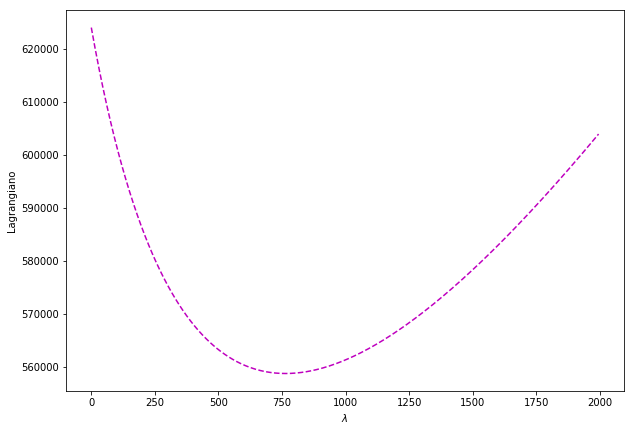

In [68]:
# Subplots:

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(lmbds, L, 'm--', label='Lagrangiano respecto de cada $\lambda$')

ax.set_xlabel('$\lambda$')
ax.set_ylabel('Lagrangiano')

plt.show()